In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True);

In [2]:
# Linear Regression với polynomial (đa thức): y=a0 + a1x1 + a2x2 + a3x3 +...
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
model=make_pipeline(PolynomialFeatures(7),LinearRegression())

# Tạo hàm có chức năng như model: => hàm này cũng không cần thiết, dùng model trên là đủ.
def poly_model(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

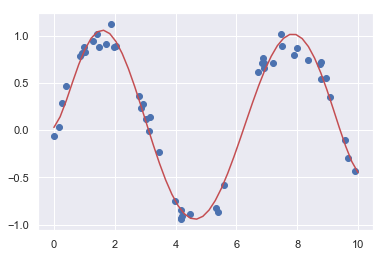

In [3]:
# Tạo dữ liệu:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
xfit=10*np.linspace(0,1,50)
yfit=model.fit(x[:, np.newaxis], y).predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit,color='r')

In [4]:
# Dùng GridSearch tìm đường cong bestfit:
from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
grid = GridSearchCV(model, param_grid, cv=7)
grid.fit(x[:,np.newaxis],y)
grid.best_params_ # Đây là các tham số tối ưu

{'linearregression__fit_intercept': False,
 'linearregression__normalize': False,
 'polynomialfeatures__degree': 10}

Text(0.5,1,'The best-fit model determined via an automatic grid-search')

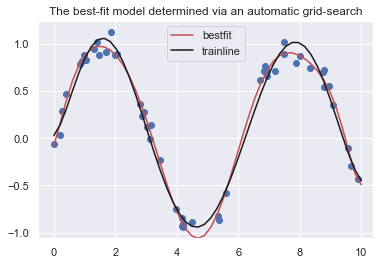

In [5]:
model_best= grid.best_estimator_ # Đây là model tối ưu
plt.scatter(x,y)
lim=plt.axis()
ytest=model_best.fit(x[:,np.newaxis],y).predict(xfit[:,np.newaxis])
plt.plot(xfit,ytest,color='r',label="bestfit")
plt.plot(xfit,yfit,color='k',label='trainline')
plt.axis(lim)
plt.legend(loc='upper center')
plt.title('The best-fit model determined via an automatic grid-search')

In [6]:
# Kết luận: đường bậc 10 là bestfit.
# Các bước tìm đường bestfit:
# 1. dùng pipeline thiết lập model
# 2. Dùng GridSearch tìm model_best: grid.best_estimator_
# 3. Tiến hành tìm ytest.

In [7]:
# Đây là các modul cập nhật trong scikit learn:
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [8]:
# It is nothing magic about polynomial functions, we might use Gaussian functions instead if they are appropriate!

# Linear Regression với Gaussian. Các hàm này không có sẵn, phải được viết thêm vào:
from sklearn.base import BaseEstimator, TransformerMixin

# Tạo class GaussianFeatures:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
    # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,self.width_, axis=1)

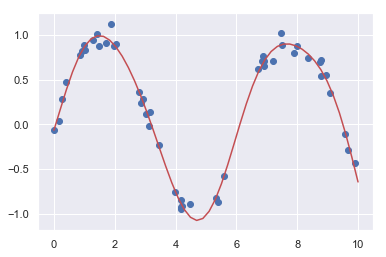

In [9]:
model_Gaussian=make_pipeline(GaussianFeatures(10),LinearRegression())
model_Gaussian.fit(x[:,np.newaxis],y)
y_fit=model_Gaussian.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,y_fit,color='r')

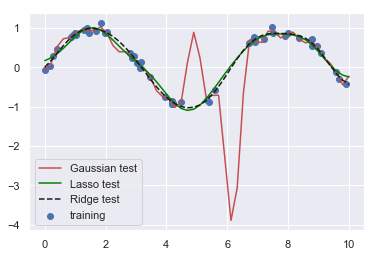

In [10]:
# Điều chỉnh độ fit với các thường quy - Ridge regression (L2 regularization) và - Lasso regularization (L1):
# Lưu ý: alpha càng nhỏ càng tốt.
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
model_R = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1)) # alpha -> 0.
model_L = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.005)) # alpha xấp xỉ 0.
model_Gaussian=make_pipeline(GaussianFeatures(30),LinearRegression())
model_Gaussian.fit(x[:,np.newaxis],y)
y_fit=model_Gaussian.predict(xfit[:,np.newaxis])
model_L.fit(x[:,np.newaxis],y)
y_L=model_L.predict(xfit[:,np.newaxis])
model_R.fit(x[:,np.newaxis],y)
y_R=model_R.predict(xfit[:,np.newaxis])
plt.scatter(x,y, label='training')
plt.plot(xfit,y_fit,color='r',label='Gaussian test')
plt.plot(xfit,y_L,color='Green',label="Lasso test")
plt.plot(xfit,y_R,color='k',linestyle='--',label='Ridge test')
plt.legend(loc='lower left')

In [11]:
# Example:
counts=pd.read_csv('https://raw.githubusercontent.com/jakevdp/SeattleBike/master/FremontHourly.csv',index_col='Date',parse_dates=True)
counts

,Fremont Bridge NB,Fremont Bridge SB
Date,,
2012-10-02 00:00:00,0.0,0.0
2012-10-02 01:00:00,0.0,0.0
2012-10-02 02:00:00,0.0,0.0
2012-10-02 03:00:00,0.0,0.0
2012-10-02 04:00:00,0.0,0.0
...,...,...
2014-05-31 19:00:00,69.0,65.0
2014-05-31 20:00:00,43.0,61.0
2014-05-31 21:00:00,27.0,27.0


In [12]:
counts.rename(columns={'Fremont Bridge NB':'NB','Fremont Bridge SB':'SB'},inplace=True)

In [13]:
counts.head()

,NB,SB
Date,,
2012-10-02 00:00:00,0.0,0.0
2012-10-02 01:00:00,0.0,0.0
2012-10-02 02:00:00,0.0,0.0
2012-10-02 03:00:00,0.0,0.0
2012-10-02 04:00:00,0.0,0.0


In [14]:
daily=counts.resample('d').sum()
daily['Total']=daily.sum(axis=1)
daily=daily[['Total']]
daily

,Total
Date,
2012-10-02,1938.0
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
...,...
2014-05-27,5032.0
2014-05-28,4008.0
2014-05-29,4587.0


In [15]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-02,1938.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-05-27,5032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2014-05-28,4008.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2014-05-29,4587.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


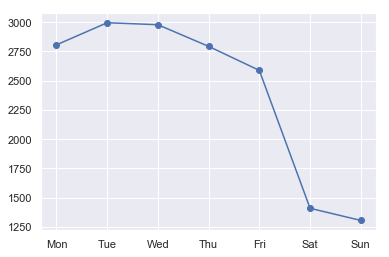

In [16]:
w=daily.pivot_table('Total',index=daily.index.dayofweek)
w.index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.plot(w,marker='o')

In [17]:
counts['total']=counts.sum(axis=1)
counts

,NB,SB,total
Date,,,
2012-10-02 00:00:00,0.0,0.0,0.0
2012-10-02 01:00:00,0.0,0.0,0.0
2012-10-02 02:00:00,0.0,0.0,0.0
2012-10-02 03:00:00,0.0,0.0,0.0
2012-10-02 04:00:00,0.0,0.0,0.0
...,...,...,...
2014-05-31 19:00:00,69.0,65.0,134.0
2014-05-31 20:00:00,43.0,61.0,104.0
2014-05-31 21:00:00,27.0,27.0,54.0


In [18]:
h=counts.pivot_table('total',index=counts.index.hour)
h

,total
Date,
0,13.085667
1,6.965404
2,5.552066
3,2.866995
4,5.617792
5,20.950577
6,81.121911
7,189.691928
8,272.985173


Text(0.5,1,'hourly average')

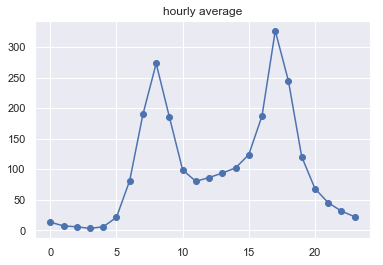

In [19]:
plt.plot(h,marker='o')
plt.title('hourly average')

In [20]:
from pandas.tseries.holiday import USFederalHolidayCalendar # Lịch ngày nghỉ lễ ở Mỹ.
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
holidays

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25', '2013-01-01', '2013-01-21',
               '2013-02-18', '2013-05-27', '2013-07-04', '2013-09-02',
               '2013-10-14', '2013-11-11', '2013-11-28', '2013-12-25',
               '2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01'],
              dtype='datetime64[ns]', freq=None)

In [21]:
pd.Series(1, index=holidays, name='holiday')

2012-01-02    1
2012-01-16    1
2012-02-20    1
2012-05-28    1
2012-07-04    1
2012-09-03    1
2012-10-08    1
2012-11-12    1
2012-11-22    1
2012-12-25    1
2013-01-01    1
2013-01-21    1
2013-02-18    1
2013-05-27    1
2013-07-04    1
2013-09-02    1
2013-10-14    1
2013-11-11    1
2013-11-28    1
2013-12-25    1
2014-01-01    1
2014-01-20    1
2014-02-17    1
2014-05-26    1
2014-07-04    1
2014-09-01    1
2014-10-13    1
2014-11-11    1
2014-11-27    1
2014-12-25    1
2015-01-01    1
2015-01-19    1
2015-02-16    1
2015-05-25    1
2015-07-03    1
2015-09-07    1
2015-10-12    1
2015-11-11    1
2015-11-26    1
2015-12-25    1
2016-01-01    1
Name: holiday, dtype: int64

In [22]:
daily=pd.merge(daily,pd.Series(1, index=holidays, name='holiday'),left_index=True,right_index=True,how='left')
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-02,1938.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
2014-05-27,5032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
2014-05-28,4008.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2014-05-29,4587.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


In [23]:
daily['holiday'].fillna(0,inplace=True)
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-02,1938.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2014-05-27,5032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2014-05-28,4008.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2014-05-29,4587.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
h=daily[daily['holiday']==1].Total.mean()
h

1623.4444444444443

In [25]:
daily[daily['holiday']==0].Total.mean()

2436.4431239388796

In [26]:
w

,Total
Mon,2806.627907
Tue,2995.931034
Wed,2979.149425
Thu,2793.931034
Fri,2588.402299
Sat,1408.885057
Sun,1305.220930


In [27]:
weather=pd.read_csv('https://raw.githubusercontent.com/jakevdp/SeattleBike/master/SeaTacWeather.csv',index_col='DATE',parse_dates=True)
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT14,WT01,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,233,89,30,40,30,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,178,100,41,10,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,189,78,73,10,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,189,83,65,20,20,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-10-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,217,89,57,360,360,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [28]:
weather['TempC']=0.5*(weather['TMAX']+weather['TMIN'])/10

In [29]:
daily=daily.join(weather[['PRCP','SNOW','TempC']])
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,SNOW,TempC
Date,,,,,,,,,,,,
2012-10-02,1938.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.90
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,13.35
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,13.60
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,15.30
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,15.85
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-27,5032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,15.00
2014-05-28,4008.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,14.45
2014-05-29,4587.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,15.00


In [44]:
column_names=['Mon','Tue','Wed','Thu','Fri','Sat','Sun','holiday','PRCP','SNOW','TempC']
x=daily[column_names]
y=daily['Total']

In [31]:
# Lập model (simple LinearRegression):

from sklearn.linear_model import LinearRegression
model_S=LinearRegression(fit_intercept=False)
model_S.fit(x,y)
daily['Predict']=model_S.predict(x)

In [32]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,SNOW,TempC,Predict
Date,,,,,,,,,,,,,
2012-10-02,1938.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.90,3490.154223
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,13.35,3470.583168
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,13.60,3340.949645
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,15.30,3267.577626
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,15.85,2183.750314
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-27,5032.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,15.00,3623.372342
2014-05-28,4008.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,14.45,3603.801287
2014-05-29,4587.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,15.00,3510.499978


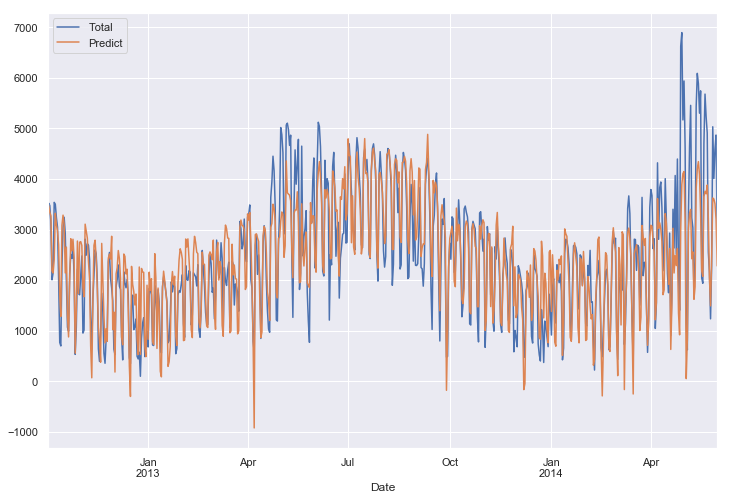

In [33]:
daily[['Total','Predict']].plot(figsize=(12,8))

In [34]:
z=pd.Series(model_S.coef_,index=x.columns)
z

Mon        1765.096654
Tue        1806.761629
Wed        1853.799634
Thu        1693.889265
Fri        1414.634699
Sat         264.198328
Sun         220.270174
holiday   -1110.454911
PRCP         -4.984287
SNOW         -0.022537
TempC       121.107381
dtype: float64

In [35]:
daily[daily['PRCP']==0].Total.mean() # Trung bình những ngày không mưa.

2908.12539184953

In [36]:
daily[daily['PRCP']!=0].Total.mean() # Trung bình những ngày mưa

1863.1770833333333

In [37]:
daily[daily['SNOW']==0].Total.mean() # Trung bình những ngày không tuyết.

2420.4800664451827

In [38]:
daily[daily['SNOW']!=0].Total.mean() # Trung bình những ngày có tuyết.

1431.6

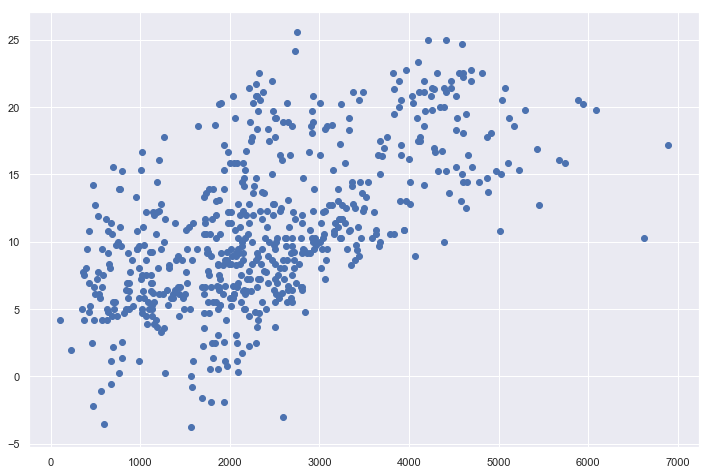

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(daily.Total,daily.TempC)

C:\Users\ipl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


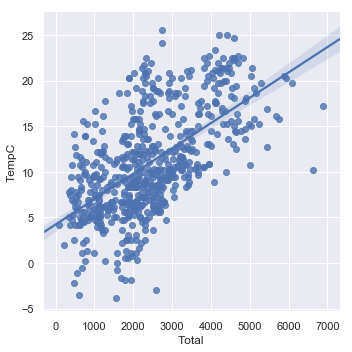

In [41]:
g=sns.lmplot(x="Total",y="TempC",data=daily)